In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "./dataset" #caminho da pasta do dataset

CATEGORIES = ["anger", "disgust", "fear", "happy", "sadness", "surprise"]

for category in CATEGORIES: 
    print(category)
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  
        plt.show()
        break  
    break  

anger


<Figure size 640x480 with 1 Axes>

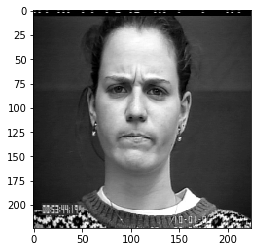

In [7]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))                 
                training_data.append([new_array, class_num]) 
            except Exception as e:
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 113/113 [00:00<00:00, 324.10it/s]


491


In [9]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

5
3
5
2
3
4
4
1
1
2


In [10]:
y = []
X = []

for features,label in training_data:   
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(X[0].shape)
print(len(X))

(224, 224, 3)
491


In [11]:
import pickle 

pickle_in = open("X.pickle","wb")
pickle.dump(X, pickle_in)
pickle_in.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
import pickle
import numpy as np

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_out = open("y.pickle","rb")
y = pickle.load(pickle_out)

X = X/255.0

X, y = np.array(X), np.array(y)

lentrain = int(len(X)*0.8)

x_train, x_test = X[:lentrain], X[lentrain:]

y_train, y_test = y[:lentrain], y[lentrain:]

len(X)


491

In [5]:
pip install tensorflow==2.0.0-rc0 

     |████████████████████████████████| 86.3MB 132kB/s 
     |████████████████████████████████| 501kB 54.0MB/s 
     |████████████████████████████████| 4.3MB 46.9MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image                  
from tqdm import tqdm

import numpy as np
import datetime as dt

#Usando TransferLearning do resnet50 do Keras

ResNet50_model = ResNet50(weights='imagenet')


In [38]:
import gc

gc.collect()

del modelres

In [42]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# Create the model
modelres = models.Sequential()
 
# Add the vgg convolutional base model
modelres.add(ResNet50_model)

modelres.add(layers.Flatten())
modelres.add(layers.Dense(1024, activation='relu'))
modelres.add(layers.Dropout(0.5))
modelres.add(layers.Dense(6, activation='softmax'))

modelres.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5), 
                       metrics=['acc'])

history = modelres.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=200, batch_size=32)


Train on 392 samples, validate on 99 samples
Epoch 1/200
392/392 [==============================] - ETA: 1:25 - loss: 1.7947 - acc: 0.156 - ETA: 40s - loss: 1.7939 - acc: 0.203 - ETA: 25s - loss: 1.7936 - acc: 0.17 - ETA: 17s - loss: 1.7905 - acc: 0.17 - ETA: 12s - loss: 1.7873 - acc: 0.20 - ETA: 9s - loss: 1.7882 - acc: 0.2188 - ETA: 7s - loss: 1.7893 - acc: 0.209 - ETA: 5s - loss: 1.7901 - acc: 0.191 - ETA: 3s - loss: 1.7894 - acc: 0.187 - ETA: 2s - loss: 1.7894 - acc: 0.187 - ETA: 1s - loss: 1.7887 - acc: 0.196 - ETA: 0s - loss: 1.7890 - acc: 0.200 - 13s 32ms/sample - loss: 1.7890 - acc: 0.1990 - val_loss: 1.7865 - val_acc: 0.3636
Epoch 2/200
392/392 [==============================] - ETA: 3s - loss: 1.7785 - acc: 0.312 - ETA: 3s - loss: 1.7862 - acc: 0.250 - ETA: 2s - loss: 1.7836 - acc: 0.270 - ETA: 2s - loss: 1.7821 - acc: 0.289 - ETA: 2s - loss: 1.7809 - acc: 0.281 - ETA: 2s - loss: 1.7818 - acc: 0.281 - ETA: 1s - loss: 1.7817 - acc: 0.290 - ETA: 1s - loss: 1.7815 - acc: 0.281 -

392/392 [==============================] - ETA: 3s - loss: 1.7457 - acc: 0.718 - ETA: 3s - loss: 1.7470 - acc: 0.625 - ETA: 3s - loss: 1.7487 - acc: 0.572 - ETA: 2s - loss: 1.7505 - acc: 0.578 - ETA: 2s - loss: 1.7476 - acc: 0.581 - ETA: 2s - loss: 1.7468 - acc: 0.572 - ETA: 1s - loss: 1.7468 - acc: 0.571 - ETA: 1s - loss: 1.7479 - acc: 0.574 - ETA: 1s - loss: 1.7474 - acc: 0.583 - ETA: 0s - loss: 1.7464 - acc: 0.587 - ETA: 0s - loss: 1.7472 - acc: 0.579 - ETA: 0s - loss: 1.7467 - acc: 0.575 - 5s 12ms/sample - loss: 1.7469 - acc: 0.5714 - val_loss: 1.7698 - val_acc: 0.4343
Epoch 15/200
392/392 [==============================] - ETA: 3s - loss: 1.7357 - acc: 0.593 - ETA: 3s - loss: 1.7386 - acc: 0.609 - ETA: 3s - loss: 1.7398 - acc: 0.625 - ETA: 2s - loss: 1.7362 - acc: 0.648 - ETA: 2s - loss: 1.7392 - acc: 0.631 - ETA: 2s - loss: 1.7417 - acc: 0.604 - ETA: 1s - loss: 1.7405 - acc: 0.620 - ETA: 1s - loss: 1.7412 - acc: 0.605 - ETA: 1s - loss: 1.7417 - acc: 0.597 - ETA: 0s - loss: 1.7412

392/392 [==============================] - ETA: 3s - loss: 1.7036 - acc: 0.750 - ETA: 3s - loss: 1.7072 - acc: 0.750 - ETA: 3s - loss: 1.7121 - acc: 0.729 - ETA: 2s - loss: 1.7135 - acc: 0.726 - ETA: 2s - loss: 1.7118 - acc: 0.737 - ETA: 2s - loss: 1.7129 - acc: 0.734 - ETA: 1s - loss: 1.7110 - acc: 0.745 - ETA: 1s - loss: 1.7095 - acc: 0.746 - ETA: 1s - loss: 1.7100 - acc: 0.736 - ETA: 0s - loss: 1.7087 - acc: 0.743 - ETA: 0s - loss: 1.7096 - acc: 0.735 - ETA: 0s - loss: 1.7079 - acc: 0.737 - 4s 11ms/sample - loss: 1.7084 - acc: 0.7347 - val_loss: 1.7407 - val_acc: 0.6061
Epoch 28/200
392/392 [==============================] - ETA: 3s - loss: 1.7182 - acc: 0.687 - ETA: 3s - loss: 1.7165 - acc: 0.734 - ETA: 2s - loss: 1.7093 - acc: 0.750 - ETA: 2s - loss: 1.7106 - acc: 0.734 - ETA: 2s - loss: 1.7079 - acc: 0.762 - ETA: 1s - loss: 1.7100 - acc: 0.755 - ETA: 1s - loss: 1.7097 - acc: 0.767 - ETA: 1s - loss: 1.7070 - acc: 0.765 - ETA: 1s - loss: 1.7084 - acc: 0.750 - ETA: 0s - loss: 1.7099

392/392 [==============================] - ETA: 3s - loss: 1.6569 - acc: 0.906 - ETA: 3s - loss: 1.6595 - acc: 0.843 - ETA: 3s - loss: 1.6638 - acc: 0.812 - ETA: 2s - loss: 1.6641 - acc: 0.828 - ETA: 2s - loss: 1.6640 - acc: 0.818 - ETA: 2s - loss: 1.6646 - acc: 0.833 - ETA: 1s - loss: 1.6626 - acc: 0.843 - ETA: 1s - loss: 1.6632 - acc: 0.839 - ETA: 1s - loss: 1.6641 - acc: 0.843 - ETA: 0s - loss: 1.6621 - acc: 0.843 - ETA: 0s - loss: 1.6633 - acc: 0.838 - ETA: 0s - loss: 1.6630 - acc: 0.843 - 4s 11ms/sample - loss: 1.6634 - acc: 0.8444 - val_loss: 1.7087 - val_acc: 0.6768
Epoch 41/200
392/392 [==============================] - ETA: 3s - loss: 1.6709 - acc: 0.781 - ETA: 3s - loss: 1.6605 - acc: 0.843 - ETA: 3s - loss: 1.6717 - acc: 0.781 - ETA: 2s - loss: 1.6727 - acc: 0.781 - ETA: 2s - loss: 1.6690 - acc: 0.812 - ETA: 2s - loss: 1.6649 - acc: 0.828 - ETA: 1s - loss: 1.6646 - acc: 0.825 - ETA: 1s - loss: 1.6669 - acc: 0.808 - ETA: 1s - loss: 1.6661 - acc: 0.822 - ETA: 0s - loss: 1.6647

392/392 [==============================] - ETA: 3s - loss: 1.6265 - acc: 0.937 - ETA: 3s - loss: 1.6183 - acc: 0.937 - ETA: 3s - loss: 1.6143 - acc: 0.927 - ETA: 2s - loss: 1.6202 - acc: 0.898 - ETA: 2s - loss: 1.6198 - acc: 0.906 - ETA: 2s - loss: 1.6227 - acc: 0.906 - ETA: 1s - loss: 1.6256 - acc: 0.901 - ETA: 1s - loss: 1.6254 - acc: 0.902 - ETA: 1s - loss: 1.6270 - acc: 0.895 - ETA: 0s - loss: 1.6281 - acc: 0.896 - ETA: 0s - loss: 1.6266 - acc: 0.900 - ETA: 0s - loss: 1.6245 - acc: 0.901 - 5s 12ms/sample - loss: 1.6245 - acc: 0.8980 - val_loss: 1.6875 - val_acc: 0.6667
Epoch 54/200
392/392 [==============================] - ETA: 3s - loss: 1.5996 - acc: 0.937 - ETA: 3s - loss: 1.6156 - acc: 0.906 - ETA: 3s - loss: 1.6145 - acc: 0.895 - ETA: 2s - loss: 1.6159 - acc: 0.921 - ETA: 2s - loss: 1.6181 - acc: 0.918 - ETA: 2s - loss: 1.6211 - acc: 0.901 - ETA: 1s - loss: 1.6221 - acc: 0.901 - ETA: 1s - loss: 1.6237 - acc: 0.890 - ETA: 1s - loss: 1.6210 - acc: 0.892 - ETA: 0s - loss: 1.6231

392/392 [==============================] - ETA: 3s - loss: 1.5780 - acc: 0.937 - ETA: 3s - loss: 1.5907 - acc: 0.890 - ETA: 2s - loss: 1.5969 - acc: 0.885 - ETA: 2s - loss: 1.5966 - acc: 0.914 - ETA: 2s - loss: 1.5916 - acc: 0.925 - ETA: 2s - loss: 1.5878 - acc: 0.927 - ETA: 1s - loss: 1.5874 - acc: 0.919 - ETA: 1s - loss: 1.5843 - acc: 0.921 - ETA: 1s - loss: 1.5833 - acc: 0.927 - ETA: 0s - loss: 1.5805 - acc: 0.928 - ETA: 0s - loss: 1.5785 - acc: 0.929 - ETA: 0s - loss: 1.5776 - acc: 0.934 - 4s 11ms/sample - loss: 1.5770 - acc: 0.9337 - val_loss: 1.6471 - val_acc: 0.7273
Epoch 67/200
392/392 [==============================] - ETA: 3s - loss: 1.5675 - acc: 0.875 - ETA: 3s - loss: 1.5763 - acc: 0.859 - ETA: 2s - loss: 1.5833 - acc: 0.854 - ETA: 2s - loss: 1.5813 - acc: 0.867 - ETA: 2s - loss: 1.5817 - acc: 0.875 - ETA: 1s - loss: 1.5754 - acc: 0.890 - ETA: 1s - loss: 1.5731 - acc: 0.897 - ETA: 1s - loss: 1.5760 - acc: 0.894 - ETA: 1s - loss: 1.5744 - acc: 0.899 - ETA: 0s - loss: 1.5756

392/392 [==============================] - ETA: 3s - loss: 1.5147 - acc: 0.968 - ETA: 3s - loss: 1.5208 - acc: 0.968 - ETA: 3s - loss: 1.5285 - acc: 0.958 - ETA: 2s - loss: 1.5263 - acc: 0.953 - ETA: 2s - loss: 1.5352 - acc: 0.956 - ETA: 2s - loss: 1.5323 - acc: 0.953 - ETA: 1s - loss: 1.5336 - acc: 0.946 - ETA: 1s - loss: 1.5321 - acc: 0.937 - ETA: 1s - loss: 1.5372 - acc: 0.927 - ETA: 0s - loss: 1.5346 - acc: 0.928 - ETA: 0s - loss: 1.5332 - acc: 0.934 - ETA: 0s - loss: 1.5349 - acc: 0.934 - 5s 12ms/sample - loss: 1.5366 - acc: 0.9311 - val_loss: 1.6245 - val_acc: 0.6970
Epoch 80/200
392/392 [==============================] - ETA: 3s - loss: 1.5164 - acc: 0.968 - ETA: 3s - loss: 1.5345 - acc: 0.968 - ETA: 3s - loss: 1.5357 - acc: 0.947 - ETA: 2s - loss: 1.5398 - acc: 0.945 - ETA: 2s - loss: 1.5347 - acc: 0.950 - ETA: 2s - loss: 1.5366 - acc: 0.942 - ETA: 1s - loss: 1.5429 - acc: 0.933 - ETA: 1s - loss: 1.5361 - acc: 0.941 - ETA: 1s - loss: 1.5341 - acc: 0.941 - ETA: 0s - loss: 1.5312

392/392 [==============================] - ETA: 3s - loss: 1.5270 - acc: 0.875 - ETA: 3s - loss: 1.5093 - acc: 0.906 - ETA: 3s - loss: 1.5138 - acc: 0.906 - ETA: 2s - loss: 1.5173 - acc: 0.906 - ETA: 2s - loss: 1.5174 - acc: 0.900 - ETA: 2s - loss: 1.5064 - acc: 0.906 - ETA: 1s - loss: 1.5026 - acc: 0.910 - ETA: 1s - loss: 1.5016 - acc: 0.910 - ETA: 1s - loss: 1.5020 - acc: 0.916 - ETA: 0s - loss: 1.5001 - acc: 0.921 - ETA: 0s - loss: 1.4966 - acc: 0.926 - ETA: 0s - loss: 1.4933 - acc: 0.929 - 4s 11ms/sample - loss: 1.4932 - acc: 0.9286 - val_loss: 1.5911 - val_acc: 0.7071
Epoch 93/200
392/392 [==============================] - ETA: 3s - loss: 1.4768 - acc: 0.937 - ETA: 3s - loss: 1.4950 - acc: 0.906 - ETA: 3s - loss: 1.4885 - acc: 0.916 - ETA: 2s - loss: 1.4893 - acc: 0.921 - ETA: 2s - loss: 1.4850 - acc: 0.937 - ETA: 2s - loss: 1.4792 - acc: 0.942 - ETA: 1s - loss: 1.4827 - acc: 0.946 - ETA: 1s - loss: 1.4796 - acc: 0.945 - ETA: 1s - loss: 1.4776 - acc: 0.947 - ETA: 0s - loss: 1.4827

392/392 [==============================] - ETA: 3s - loss: 1.4452 - acc: 0.937 - ETA: 3s - loss: 1.4461 - acc: 0.968 - ETA: 2s - loss: 1.4520 - acc: 0.947 - ETA: 2s - loss: 1.4477 - acc: 0.937 - ETA: 2s - loss: 1.4542 - acc: 0.943 - ETA: 2s - loss: 1.4457 - acc: 0.953 - ETA: 1s - loss: 1.4512 - acc: 0.955 - ETA: 1s - loss: 1.4478 - acc: 0.953 - ETA: 1s - loss: 1.4431 - acc: 0.951 - ETA: 0s - loss: 1.4439 - acc: 0.953 - ETA: 0s - loss: 1.4446 - acc: 0.948 - ETA: 0s - loss: 1.4471 - acc: 0.950 - 4s 11ms/sample - loss: 1.4482 - acc: 0.9464 - val_loss: 1.5652 - val_acc: 0.7475
Epoch 106/200
392/392 [==============================] - ETA: 3s - loss: 1.4093 - acc: 0.968 - ETA: 3s - loss: 1.4030 - acc: 0.968 - ETA: 2s - loss: 1.4132 - acc: 0.968 - ETA: 2s - loss: 1.4163 - acc: 0.960 - ETA: 2s - loss: 1.4286 - acc: 0.962 - ETA: 2s - loss: 1.4342 - acc: 0.963 - ETA: 1s - loss: 1.4365 - acc: 0.955 - ETA: 1s - loss: 1.4351 - acc: 0.957 - ETA: 1s - loss: 1.4338 - acc: 0.961 - ETA: 0s - loss: 1.437

392/392 [==============================] - ETA: 3s - loss: 1.4469 - acc: 0.937 - ETA: 3s - loss: 1.4396 - acc: 0.921 - ETA: 3s - loss: 1.4264 - acc: 0.916 - ETA: 2s - loss: 1.4127 - acc: 0.921 - ETA: 2s - loss: 1.3988 - acc: 0.937 - ETA: 2s - loss: 1.3914 - acc: 0.937 - ETA: 1s - loss: 1.3933 - acc: 0.933 - ETA: 1s - loss: 1.3921 - acc: 0.941 - ETA: 1s - loss: 1.3932 - acc: 0.944 - ETA: 0s - loss: 1.3948 - acc: 0.950 - ETA: 0s - loss: 1.3985 - acc: 0.951 - ETA: 0s - loss: 1.3965 - acc: 0.947 - 5s 12ms/sample - loss: 1.3999 - acc: 0.9464 - val_loss: 1.5216 - val_acc: 0.7677
Epoch 119/200
392/392 [==============================] - ETA: 3s - loss: 1.3981 - acc: 0.906 - ETA: 3s - loss: 1.3931 - acc: 0.921 - ETA: 3s - loss: 1.3918 - acc: 0.947 - ETA: 2s - loss: 1.3921 - acc: 0.953 - ETA: 2s - loss: 1.3999 - acc: 0.943 - ETA: 2s - loss: 1.3948 - acc: 0.937 - ETA: 1s - loss: 1.3945 - acc: 0.946 - ETA: 1s - loss: 1.3993 - acc: 0.945 - ETA: 1s - loss: 1.3955 - acc: 0.951 - ETA: 0s - loss: 1.395

392/392 [==============================] - ETA: 3s - loss: 1.3031 - acc: 1.000 - ETA: 3s - loss: 1.3310 - acc: 1.000 - ETA: 2s - loss: 1.3168 - acc: 0.989 - ETA: 2s - loss: 1.3259 - acc: 0.992 - ETA: 2s - loss: 1.3394 - acc: 0.968 - ETA: 2s - loss: 1.3455 - acc: 0.963 - ETA: 1s - loss: 1.3518 - acc: 0.955 - ETA: 1s - loss: 1.3544 - acc: 0.960 - ETA: 1s - loss: 1.3531 - acc: 0.961 - ETA: 0s - loss: 1.3531 - acc: 0.959 - ETA: 0s - loss: 1.3538 - acc: 0.954 - ETA: 0s - loss: 1.3536 - acc: 0.958 - 4s 11ms/sample - loss: 1.3538 - acc: 0.9592 - val_loss: 1.4955 - val_acc: 0.7374
Epoch 132/200
392/392 [==============================] - ETA: 3s - loss: 1.3249 - acc: 1.000 - ETA: 3s - loss: 1.3137 - acc: 0.984 - ETA: 3s - loss: 1.3390 - acc: 0.968 - ETA: 2s - loss: 1.3547 - acc: 0.968 - ETA: 2s - loss: 1.3497 - acc: 0.968 - ETA: 2s - loss: 1.3504 - acc: 0.974 - ETA: 1s - loss: 1.3518 - acc: 0.977 - ETA: 1s - loss: 1.3486 - acc: 0.968 - ETA: 1s - loss: 1.3467 - acc: 0.972 - ETA: 0s - loss: 1.345

392/392 [==============================] - ETA: 3s - loss: 1.3814 - acc: 0.906 - ETA: 3s - loss: 1.3717 - acc: 0.953 - ETA: 2s - loss: 1.3364 - acc: 0.968 - ETA: 2s - loss: 1.3229 - acc: 0.976 - ETA: 2s - loss: 1.3077 - acc: 0.981 - ETA: 1s - loss: 1.3060 - acc: 0.979 - ETA: 1s - loss: 1.3078 - acc: 0.977 - ETA: 1s - loss: 1.3007 - acc: 0.980 - ETA: 1s - loss: 1.3023 - acc: 0.982 - ETA: 0s - loss: 1.3005 - acc: 0.981 - ETA: 0s - loss: 1.3002 - acc: 0.983 - ETA: 0s - loss: 1.2975 - acc: 0.984 - 4s 11ms/sample - loss: 1.2971 - acc: 0.9847 - val_loss: 1.4767 - val_acc: 0.6869
Epoch 145/200
392/392 [==============================] - ETA: 3s - loss: 1.3191 - acc: 0.937 - ETA: 3s - loss: 1.3288 - acc: 0.937 - ETA: 2s - loss: 1.3165 - acc: 0.937 - ETA: 2s - loss: 1.3139 - acc: 0.945 - ETA: 2s - loss: 1.3140 - acc: 0.956 - ETA: 2s - loss: 1.3179 - acc: 0.958 - ETA: 1s - loss: 1.3165 - acc: 0.959 - ETA: 1s - loss: 1.3111 - acc: 0.960 - ETA: 1s - loss: 1.3059 - acc: 0.965 - ETA: 0s - loss: 1.306

392/392 [==============================] - ETA: 3s - loss: 1.2498 - acc: 1.000 - ETA: 3s - loss: 1.2375 - acc: 1.000 - ETA: 2s - loss: 1.2316 - acc: 1.000 - ETA: 2s - loss: 1.2420 - acc: 0.984 - ETA: 2s - loss: 1.2366 - acc: 0.987 - ETA: 2s - loss: 1.2413 - acc: 0.989 - ETA: 1s - loss: 1.2437 - acc: 0.991 - ETA: 1s - loss: 1.2345 - acc: 0.988 - ETA: 1s - loss: 1.2342 - acc: 0.986 - ETA: 0s - loss: 1.2400 - acc: 0.981 - ETA: 0s - loss: 1.2441 - acc: 0.977 - ETA: 0s - loss: 1.2449 - acc: 0.979 - 5s 12ms/sample - loss: 1.2461 - acc: 0.9796 - val_loss: 1.3851 - val_acc: 0.7879
Epoch 158/200
392/392 [==============================] - ETA: 3s - loss: 1.3100 - acc: 0.906 - ETA: 3s - loss: 1.2663 - acc: 0.937 - ETA: 3s - loss: 1.2370 - acc: 0.958 - ETA: 2s - loss: 1.2324 - acc: 0.960 - ETA: 2s - loss: 1.2407 - acc: 0.962 - ETA: 2s - loss: 1.2439 - acc: 0.963 - ETA: 1s - loss: 1.2387 - acc: 0.968 - ETA: 1s - loss: 1.2402 - acc: 0.972 - ETA: 1s - loss: 1.2352 - acc: 0.975 - ETA: 0s - loss: 1.233

392/392 [==============================] - ETA: 3s - loss: 1.1414 - acc: 1.000 - ETA: 3s - loss: 1.1625 - acc: 1.000 - ETA: 3s - loss: 1.1843 - acc: 0.968 - ETA: 2s - loss: 1.1963 - acc: 0.953 - ETA: 2s - loss: 1.2080 - acc: 0.962 - ETA: 2s - loss: 1.2044 - acc: 0.968 - ETA: 1s - loss: 1.2001 - acc: 0.973 - ETA: 1s - loss: 1.1937 - acc: 0.972 - ETA: 1s - loss: 1.1946 - acc: 0.975 - ETA: 0s - loss: 1.1915 - acc: 0.978 - ETA: 0s - loss: 1.1978 - acc: 0.977 - ETA: 0s - loss: 1.1975 - acc: 0.979 - 5s 12ms/sample - loss: 1.1981 - acc: 0.9796 - val_loss: 1.3806 - val_acc: 0.7475
Epoch 171/200
392/392 [==============================] - ETA: 3s - loss: 1.2034 - acc: 1.000 - ETA: 3s - loss: 1.1997 - acc: 1.000 - ETA: 3s - loss: 1.2118 - acc: 0.989 - ETA: 2s - loss: 1.2118 - acc: 0.984 - ETA: 2s - loss: 1.2031 - acc: 0.987 - ETA: 2s - loss: 1.1973 - acc: 0.989 - ETA: 1s - loss: 1.1991 - acc: 0.986 - ETA: 1s - loss: 1.2030 - acc: 0.984 - ETA: 1s - loss: 1.2029 - acc: 0.986 - ETA: 0s - loss: 1.200

392/392 [==============================] - ETA: 3s - loss: 1.1953 - acc: 0.906 - ETA: 3s - loss: 1.1889 - acc: 0.937 - ETA: 3s - loss: 1.1802 - acc: 0.958 - ETA: 2s - loss: 1.1560 - acc: 0.968 - ETA: 2s - loss: 1.1488 - acc: 0.975 - ETA: 2s - loss: 1.1465 - acc: 0.979 - ETA: 1s - loss: 1.1493 - acc: 0.982 - ETA: 1s - loss: 1.1502 - acc: 0.980 - ETA: 1s - loss: 1.1456 - acc: 0.982 - ETA: 0s - loss: 1.1419 - acc: 0.984 - ETA: 0s - loss: 1.1410 - acc: 0.985 - ETA: 0s - loss: 1.1497 - acc: 0.976 - 5s 12ms/sample - loss: 1.1492 - acc: 0.9770 - val_loss: 1.3340 - val_acc: 0.7677
Epoch 184/200
392/392 [==============================] - ETA: 3s - loss: 1.1343 - acc: 0.968 - ETA: 3s - loss: 1.1573 - acc: 0.968 - ETA: 3s - loss: 1.1256 - acc: 0.979 - ETA: 2s - loss: 1.1430 - acc: 0.976 - ETA: 2s - loss: 1.1444 - acc: 0.981 - ETA: 2s - loss: 1.1427 - acc: 0.979 - ETA: 1s - loss: 1.1377 - acc: 0.982 - ETA: 1s - loss: 1.1399 - acc: 0.984 - ETA: 1s - loss: 1.1375 - acc: 0.982 - ETA: 0s - loss: 1.133

392/392 [==============================] - ETA: 3s - loss: 1.0494 - acc: 0.968 - ETA: 3s - loss: 1.0733 - acc: 0.984 - ETA: 2s - loss: 1.0888 - acc: 0.989 - ETA: 2s - loss: 1.1017 - acc: 0.984 - ETA: 2s - loss: 1.0962 - acc: 0.987 - ETA: 2s - loss: 1.0918 - acc: 0.989 - ETA: 1s - loss: 1.0861 - acc: 0.991 - ETA: 1s - loss: 1.0948 - acc: 0.988 - ETA: 1s - loss: 1.0895 - acc: 0.989 - ETA: 0s - loss: 1.0869 - acc: 0.990 - ETA: 0s - loss: 1.0896 - acc: 0.991 - ETA: 0s - loss: 1.0913 - acc: 0.989 - 4s 11ms/sample - loss: 1.0964 - acc: 0.9847 - val_loss: 1.3988 - val_acc: 0.6465
Epoch 197/200
392/392 [==============================] - ETA: 3s - loss: 1.1418 - acc: 0.968 - ETA: 3s - loss: 1.1194 - acc: 0.984 - ETA: 2s - loss: 1.0988 - acc: 0.989 - ETA: 2s - loss: 1.1121 - acc: 0.976 - ETA: 2s - loss: 1.1161 - acc: 0.968 - ETA: 2s - loss: 1.1101 - acc: 0.974 - ETA: 1s - loss: 1.1111 - acc: 0.973 - ETA: 1s - loss: 1.1096 - acc: 0.972 - ETA: 1s - loss: 1.1115 - acc: 0.972 - ETA: 0s - loss: 1.111

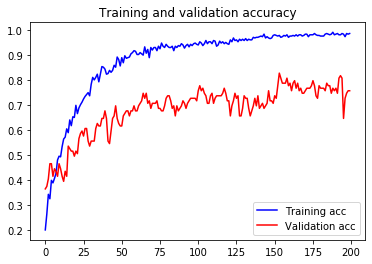

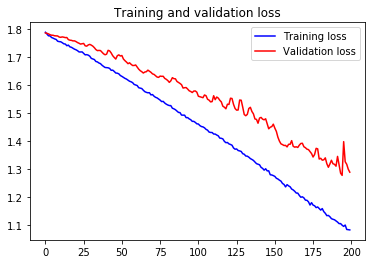

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [44]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    :param cm: (numpy matrix) confusion matrix
    :param classes: [str]
    :param normalize: (bool)
    :param title: (str)
    :param cmap: (matplotlib color map)
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 8))   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]*100, fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout(5,5,5,(2,2,3.2,3.2))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

def accuracy_per_class(net):
    
    n_classes = len(emotions)
    # (real, predicted)
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=np.int64)

    for images, labels in validation_loader:
        images, labels = images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        for i in range(batch_size):
            confusion_matrix[labels[i], predicted[i]] += 1
            label = labels[i]

    print("{:<10} {:^10}".format("Class", "Accuracy (%)"))
    for i in range(n_classes):
        class_total = confusion_matrix[i, :].sum()
        class_correct = confusion_matrix[i, i]
        percentage_correct = 100.0 * float(class_correct) / class_total
        
        print('{:<10} {:^10.2f}'.format(classes[i], percentage_correct))
    return confusion_matrix

In [45]:
%matplotlib inline
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


Y_pred = modelres.predict(np.array(x_test))
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
print('Classification Report')
target_names = ["anger", "disgust", "fear", "happy", "sadness", "surprise"]
print(classification_report(y_test, y_pred, target_names=target_names))

y_pred

Confusion Matrix
[[ 8  3  0  1  4  0]
 [ 0 14  0  2  0  1]
 [ 1  0 10  2  1  1]
 [ 0  0  1 21  1  0]
 [ 3  0  2  1  5  0]
 [ 0  0  0  0  0 17]]
Classification Report
              precision    recall  f1-score   support

       anger       0.67      0.50      0.57        16
     disgust       0.82      0.82      0.82        17
        fear       0.77      0.67      0.71        15
       happy       0.78      0.91      0.84        23
     sadness       0.45      0.45      0.45        11
    surprise       0.89      1.00      0.94        17

    accuracy                           0.76        99
   macro avg       0.73      0.73      0.72        99
weighted avg       0.75      0.76      0.75        99



array([0, 3, 5, 5, 0, 5, 5, 2, 5, 1, 3, 3, 4, 5, 4, 1, 5, 0, 0, 5, 5, 3,
       3, 3, 5, 3, 0, 4, 3, 5, 2, 3, 1, 1, 3, 2, 3, 0, 2, 1, 2, 2, 3, 4,
       4, 3, 1, 2, 2, 3, 4, 1, 1, 4, 3, 1, 5, 5, 0, 1, 1, 1, 3, 4, 0, 5,
       3, 3, 0, 0, 5, 3, 3, 5, 3, 1, 2, 2, 1, 4, 5, 4, 2, 3, 3, 4, 1, 1,
       1, 3, 0, 3, 2, 5, 0, 3, 3, 2, 5], dtype=int64)

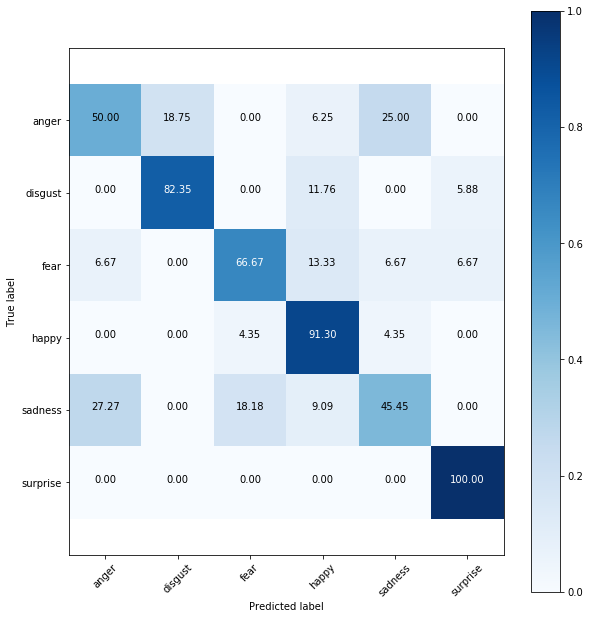

In [46]:
plot_confusion_matrix(cm, target_names, normalize=True,
                      title='')

In [47]:
from tensorflow.keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [48]:
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x0000022E75CF4588> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000022E75CF42E8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000022E632F6F28> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000022E75D1BD68> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000022E5FB6FEB8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000022DF3A2CB38> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000022DF3A13DD8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000022DF3A13E48> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000022E4F35E5C0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000022E4F369860> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000022E4F36EB00> True
<tensorflow.python.keras.layer

In [49]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 6150      
Total params: 40,411,974
Trainable params: 40,411,974
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5),
              metrics=['acc'])
# Train the model
history = model.fit(x_train, y_train, epochs=100,
          validation_data=(x_test, y_test), batch_size=32)
 
# Save the model
model.save('vgg16emo.h5')

Train on 392 samples, validate on 99 samples
Epoch 1/100
392/392 [==============================] - ETA: 45s - loss: 2.3391 - acc: 0.09 - ETA: 22s - loss: 2.1011 - acc: 0.17 - ETA: 14s - loss: 2.0516 - acc: 0.16 - ETA: 10s - loss: 2.0183 - acc: 0.21 - ETA: 8s - loss: 1.9942 - acc: 0.2062 - ETA: 6s - loss: 1.9850 - acc: 0.208 - ETA: 4s - loss: 1.9894 - acc: 0.209 - ETA: 3s - loss: 1.9753 - acc: 0.214 - ETA: 2s - loss: 1.9381 - acc: 0.225 - ETA: 1s - loss: 1.9024 - acc: 0.243 - ETA: 0s - loss: 1.9083 - acc: 0.247 - ETA: 0s - loss: 1.9024 - acc: 0.250 - 11s 28ms/sample - loss: 1.9027 - acc: 0.2500 - val_loss: 1.6304 - val_acc: 0.4646
Epoch 2/100
392/392 [==============================] - ETA: 4s - loss: 1.5859 - acc: 0.281 - ETA: 4s - loss: 1.5736 - acc: 0.359 - ETA: 3s - loss: 1.6264 - acc: 0.333 - ETA: 3s - loss: 1.6570 - acc: 0.320 - ETA: 2s - loss: 1.6194 - acc: 0.350 - ETA: 2s - loss: 1.6414 - acc: 0.338 - ETA: 2s - loss: 1.6140 - acc: 0.339 - ETA: 1s - loss: 1.5741 - acc: 0.355 - ET

392/392 [==============================] - ETA: 4s - loss: 0.2103 - acc: 0.875 - ETA: 4s - loss: 0.1640 - acc: 0.921 - ETA: 3s - loss: 0.2202 - acc: 0.906 - ETA: 3s - loss: 0.1848 - acc: 0.929 - ETA: 3s - loss: 0.1828 - acc: 0.931 - ETA: 2s - loss: 0.1675 - acc: 0.937 - ETA: 2s - loss: 0.1524 - acc: 0.946 - ETA: 1s - loss: 0.1522 - acc: 0.941 - ETA: 1s - loss: 0.1458 - acc: 0.947 - ETA: 0s - loss: 0.1454 - acc: 0.950 - ETA: 0s - loss: 0.1486 - acc: 0.948 - ETA: 0s - loss: 0.1542 - acc: 0.947 - 6s 15ms/sample - loss: 0.1537 - acc: 0.9490 - val_loss: 0.6255 - val_acc: 0.8384
Epoch 15/100
392/392 [==============================] - ETA: 4s - loss: 0.1295 - acc: 0.906 - ETA: 4s - loss: 0.0917 - acc: 0.953 - ETA: 3s - loss: 0.0964 - acc: 0.958 - ETA: 3s - loss: 0.0822 - acc: 0.968 - ETA: 2s - loss: 0.0786 - acc: 0.975 - ETA: 2s - loss: 0.0943 - acc: 0.968 - ETA: 2s - loss: 0.0893 - acc: 0.973 - ETA: 1s - loss: 0.0977 - acc: 0.968 - ETA: 1s - loss: 0.0928 - acc: 0.972 - ETA: 0s - loss: 0.0868

392/392 [==============================] - ETA: 4s - loss: 0.0061 - acc: 1.000 - ETA: 4s - loss: 0.0105 - acc: 1.000 - ETA: 3s - loss: 0.0075 - acc: 1.000 - ETA: 3s - loss: 0.0471 - acc: 0.984 - ETA: 2s - loss: 0.0407 - acc: 0.987 - ETA: 2s - loss: 0.0355 - acc: 0.989 - ETA: 2s - loss: 0.0312 - acc: 0.991 - ETA: 1s - loss: 0.0291 - acc: 0.992 - ETA: 1s - loss: 0.0266 - acc: 0.993 - ETA: 0s - loss: 0.0268 - acc: 0.993 - ETA: 0s - loss: 0.0346 - acc: 0.988 - ETA: 0s - loss: 0.0331 - acc: 0.989 - 6s 14ms/sample - loss: 0.0328 - acc: 0.9898 - val_loss: 0.6925 - val_acc: 0.8283
Epoch 28/100
392/392 [==============================] - ETA: 4s - loss: 0.0043 - acc: 1.000 - ETA: 4s - loss: 0.0052 - acc: 1.000 - ETA: 3s - loss: 0.0280 - acc: 0.989 - ETA: 3s - loss: 0.0253 - acc: 0.992 - ETA: 3s - loss: 0.0278 - acc: 0.987 - ETA: 2s - loss: 0.0235 - acc: 0.989 - ETA: 2s - loss: 0.0224 - acc: 0.991 - ETA: 1s - loss: 0.0228 - acc: 0.992 - ETA: 1s - loss: 0.0273 - acc: 0.989 - ETA: 0s - loss: 0.0316

392/392 [==============================] - ETA: 4s - loss: 0.0045 - acc: 1.000 - ETA: 4s - loss: 0.0027 - acc: 1.000 - ETA: 3s - loss: 0.0024 - acc: 1.000 - ETA: 3s - loss: 0.0021 - acc: 1.000 - ETA: 2s - loss: 0.0021 - acc: 1.000 - ETA: 2s - loss: 0.0019 - acc: 1.000 - ETA: 2s - loss: 0.0017 - acc: 1.000 - ETA: 1s - loss: 0.0018 - acc: 1.000 - ETA: 1s - loss: 0.0017 - acc: 1.000 - ETA: 0s - loss: 0.0016 - acc: 1.000 - ETA: 0s - loss: 0.0015 - acc: 1.000 - ETA: 0s - loss: 0.0016 - acc: 1.000 - 5s 14ms/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.7854 - val_acc: 0.8586
Epoch 41/100
392/392 [==============================] - ETA: 4s - loss: 0.0013 - acc: 1.000 - ETA: 4s - loss: 8.1372e-04 - acc: 1.000 - ETA: 3s - loss: 7.9814e-04 - acc: 1.000 - ETA: 3s - loss: 0.0010 - acc: 1.0000    - ETA: 3s - loss: 0.0011 - acc: 1.000 - ETA: 2s - loss: 0.0017 - acc: 1.000 - ETA: 2s - loss: 0.0019 - acc: 1.000 - ETA: 1s - loss: 0.0022 - acc: 1.000 - ETA: 1s - loss: 0.0022 - acc: 1.000 - ETA: 0s - 

392/392 [==============================] - ETA: 4s - loss: 4.3449e-04 - acc: 1.000 - ETA: 4s - loss: 8.9350e-04 - acc: 1.000 - ETA: 3s - loss: 9.9464e-04 - acc: 1.000 - ETA: 3s - loss: 8.1640e-04 - acc: 1.000 - ETA: 2s - loss: 0.0075 - acc: 0.9937    - ETA: 2s - loss: 0.0064 - acc: 0.994 - ETA: 2s - loss: 0.0058 - acc: 0.995 - ETA: 1s - loss: 0.0051 - acc: 0.996 - ETA: 1s - loss: 0.0051 - acc: 0.996 - ETA: 0s - loss: 0.0047 - acc: 0.996 - ETA: 0s - loss: 0.0043 - acc: 0.997 - ETA: 0s - loss: 0.0065 - acc: 0.994 - 5s 14ms/sample - loss: 0.0064 - acc: 0.9949 - val_loss: 0.7560 - val_acc: 0.8485
Epoch 54/100
392/392 [==============================] - ETA: 4s - loss: 4.7869e-04 - acc: 1.000 - ETA: 4s - loss: 5.0956e-04 - acc: 1.000 - ETA: 3s - loss: 0.0016 - acc: 1.0000    - ETA: 3s - loss: 0.0072 - acc: 1.000 - ETA: 2s - loss: 0.0062 - acc: 1.000 - ETA: 2s - loss: 0.0061 - acc: 1.000 - ETA: 2s - loss: 0.0061 - acc: 1.000 - ETA: 1s - loss: 0.0054 - acc: 1.000 - ETA: 1s - loss: 0.0048 - acc

392/392 [==============================] - ETA: 4s - loss: 5.6628e-04 - acc: 1.000 - ETA: 4s - loss: 0.0010 - acc: 1.0000    - ETA: 3s - loss: 0.0011 - acc: 1.000 - ETA: 3s - loss: 9.3944e-04 - acc: 1.000 - ETA: 2s - loss: 8.7984e-04 - acc: 1.000 - ETA: 2s - loss: 9.4106e-04 - acc: 1.000 - ETA: 2s - loss: 9.2517e-04 - acc: 1.000 - ETA: 1s - loss: 9.9174e-04 - acc: 1.000 - ETA: 1s - loss: 9.9648e-04 - acc: 1.000 - ETA: 0s - loss: 9.5340e-04 - acc: 1.000 - ETA: 0s - loss: 8.9900e-04 - acc: 1.000 - ETA: 0s - loss: 8.8843e-04 - acc: 1.000 - 6s 14ms/sample - loss: 9.1414e-04 - acc: 1.0000 - val_loss: 0.6458 - val_acc: 0.8283
Epoch 67/100
392/392 [==============================] - ETA: 4s - loss: 0.0018 - acc: 1.000 - ETA: 4s - loss: 0.0038 - acc: 1.000 - ETA: 3s - loss: 0.0043 - acc: 1.000 - ETA: 3s - loss: 0.0035 - acc: 1.000 - ETA: 2s - loss: 0.0031 - acc: 1.000 - ETA: 2s - loss: 0.0030 - acc: 1.000 - ETA: 2s - loss: 0.0045 - acc: 1.000 - ETA: 1s - loss: 0.0041 - acc: 1.000 - ETA: 1s - lo

392/392 [==============================] - ETA: 4s - loss: 3.3898e-04 - acc: 1.000 - ETA: 4s - loss: 5.0440e-04 - acc: 1.000 - ETA: 3s - loss: 5.0984e-04 - acc: 1.000 - ETA: 3s - loss: 5.2842e-04 - acc: 1.000 - ETA: 2s - loss: 8.8873e-04 - acc: 1.000 - ETA: 2s - loss: 7.6700e-04 - acc: 1.000 - ETA: 2s - loss: 8.2264e-04 - acc: 1.000 - ETA: 1s - loss: 7.5754e-04 - acc: 1.000 - ETA: 1s - loss: 6.9040e-04 - acc: 1.000 - ETA: 0s - loss: 6.7516e-04 - acc: 1.000 - ETA: 0s - loss: 6.3379e-04 - acc: 1.000 - ETA: 0s - loss: 5.9249e-04 - acc: 1.000 - 6s 14ms/sample - loss: 5.8507e-04 - acc: 1.0000 - val_loss: 0.6923 - val_acc: 0.8586
Epoch 80/100
392/392 [==============================] - ETA: 4s - loss: 4.8003e-04 - acc: 1.000 - ETA: 4s - loss: 3.1332e-04 - acc: 1.000 - ETA: 3s - loss: 4.8791e-04 - acc: 1.000 - ETA: 3s - loss: 5.0606e-04 - acc: 1.000 - ETA: 2s - loss: 5.2930e-04 - acc: 1.000 - ETA: 2s - loss: 5.2401e-04 - acc: 1.000 - ETA: 2s - loss: 5.3563e-04 - acc: 1.000 - ETA: 1s - loss: 5.

392/392 [==============================] - ETA: 4s - loss: 0.0022 - acc: 1.000 - ETA: 4s - loss: 0.0012 - acc: 1.000 - ETA: 3s - loss: 9.6050e-04 - acc: 1.000 - ETA: 3s - loss: 7.6338e-04 - acc: 1.000 - ETA: 2s - loss: 9.8386e-04 - acc: 1.000 - ETA: 2s - loss: 8.4053e-04 - acc: 1.000 - ETA: 2s - loss: 7.4343e-04 - acc: 1.000 - ETA: 1s - loss: 6.8341e-04 - acc: 1.000 - ETA: 1s - loss: 6.1742e-04 - acc: 1.000 - ETA: 0s - loss: 6.0084e-04 - acc: 1.000 - ETA: 0s - loss: 5.9657e-04 - acc: 1.000 - ETA: 0s - loss: 5.7186e-04 - acc: 1.000 - 6s 14ms/sample - loss: 5.7417e-04 - acc: 1.0000 - val_loss: 0.7217 - val_acc: 0.8485
Epoch 92/100
392/392 [==============================] - ETA: 4s - loss: 1.3201e-04 - acc: 1.000 - ETA: 4s - loss: 1.4842e-04 - acc: 1.000 - ETA: 3s - loss: 1.4298e-04 - acc: 1.000 - ETA: 3s - loss: 1.4113e-04 - acc: 1.000 - ETA: 2s - loss: 2.0893e-04 - acc: 1.000 - ETA: 2s - loss: 2.0816e-04 - acc: 1.000 - ETA: 2s - loss: 2.0047e-04 - acc: 1.000 - ETA: 1s - loss: 1.8965e-04

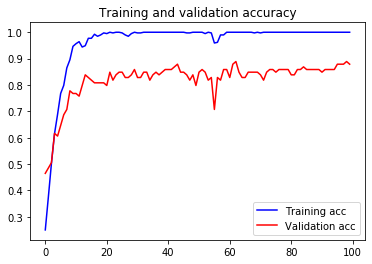

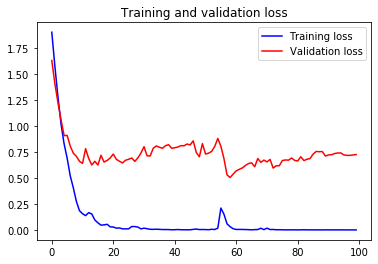

In [51]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [54]:
%matplotlib inline
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(np.array(x_test))
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix')
print(cm)
print('Classification Report')
target_names = ["anger", "disgust", "fear", "happy", "sadness", "surprise"]
print(classification_report(y_test, y_pred, target_names=target_names))

y_pred

Confusion Matrix
[[14  2  0  0  0  0]
 [ 0 16  0  0  1  0]
 [ 0  0 10  2  3  0]
 [ 0  0  1 21  1  0]
 [ 2  0  0  0  9  0]
 [ 0  0  0  0  0 17]]
Classification Report
              precision    recall  f1-score   support

       anger       0.88      0.88      0.88        16
     disgust       0.89      0.94      0.91        17
        fear       0.91      0.67      0.77        15
       happy       0.91      0.91      0.91        23
     sadness       0.64      0.82      0.72        11
    surprise       1.00      1.00      1.00        17

    accuracy                           0.88        99
   macro avg       0.87      0.87      0.87        99
weighted avg       0.89      0.88      0.88        99



array([0, 3, 5, 5, 0, 5, 5, 2, 5, 1, 3, 3, 0, 5, 0, 1, 5, 4, 0, 5, 4, 3,
       3, 3, 5, 3, 0, 4, 0, 5, 2, 3, 1, 1, 3, 2, 3, 0, 2, 0, 2, 2, 3, 4,
       4, 3, 1, 0, 2, 3, 4, 1, 1, 4, 3, 1, 4, 5, 0, 1, 1, 0, 1, 1, 4, 5,
       3, 3, 0, 1, 5, 1, 3, 5, 3, 1, 2, 2, 1, 0, 5, 4, 4, 3, 3, 4, 1, 0,
       1, 3, 4, 3, 2, 5, 0, 4, 3, 2, 5], dtype=int64)

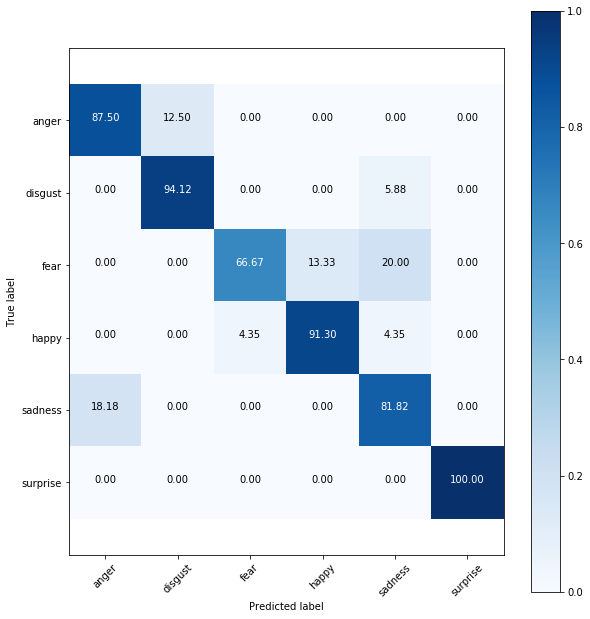

In [55]:
plot_confusion_matrix(cm, target_names, normalize=True,
                      title='')